Ici on va créer deux jeux de données (avec train et test fixés )que nous utiliserons pour comparer différentes méthodes d'apprentissage.
 
Un premier dictionaire où nous répartissons de manière aléatoire le train et le test set ( séparation classique ). 

Un deuxième doctionnaire où nous ne prennons que les derniers sondages que nous avons recuillis pour constituer le test set ( séparation progressive).


Mérite plus d'explications dans le latex ...

## Accès aux données

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import cv2
from PIL import Image

%matplotlib inline
import matplotlib.pyplot as plt

from glob import glob
import os

### Train et Test classiques 

In [3]:
%%time

imPath = "Database/All_pictures/"
ls_path = glob(os.path.join(imPath, '*' ))

Wall time: 328 ms


In [4]:
%%time
images_base_vide=[]
label_nom_vide=[]

for file in ls_path: 
    im = np.array(Image.open(file))[:,:,3]   #On charge l'image
    images_base_vide+=[im]
    label_nom_vide+=[file.split('\\')[1].split('_')[0]]   ## Attention ici Solène si ça marche pas . Pas meme code pour chemin ...

images_base_raw=np.array(images_base_vide)
label_nom_raw=np.array(label_nom_vide)

Wall time: 21.3 s


In [5]:
images_base_raw.shape

(1511,)

In [6]:
def print_exemple_image(num_image,X=images_base_raw,y=label_nom_vide) :
    plt.imshow(X[num_image],cmap='Greys')
    plt.suptitle("Image n°"+str(num_image)+" : "+str(y[num_image]), fontsize=20)

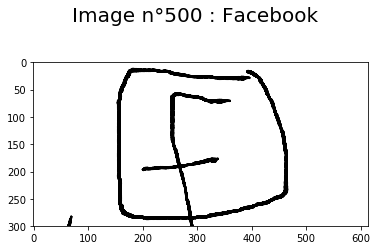

In [7]:
print_exemple_image(500)

On fait le train et test set avec découpage classique

In [8]:
from sklearn.model_selection import train_test_split

ramdom_seed_fixée=5

def get_split_classique() :
    return train_test_split(images_base_raw, label_nom_raw, test_size=0.20, random_state=ramdom_seed_fixée)



In [9]:
X_train_classique , X_test_classique , Y_train_classique , Y_test_classique = get_split_classique()

In [10]:
X_train_classique.shape


(1208,)

In [43]:
for k in range(7) :
    print((k%2)*(((k+1)//2))*5+(1-k%2)*(((k+1)//2)*(-5)))

0
5
-5


Ici on converti dans un dictionnaire

In [33]:
label_to_OneHot = {'Deezer':[1,0,0,0],'Messenger':[0,1,0,0],'Facebook':[0,0,1,0],'Tinder':[0,0,0,1]}
label_to_num = {'Deezer':0 ,'Messenger':1 ,'Facebook':2,'Tinder':3} 

def transformation_dictionnaire_image(X,Y,data_aug=1,num_pixel_cote=64) : 
    taille = X.shape[0]
    data_base={'image':[], 'data': [], 'label_num' : [],'label_OneHot' : [],'nom_label' :[]}
    for i in range(taille) : 
        im = cv2.resize(X[i], (num_pixel_cote,num_pixel_cote))
        name=Y[i]
        
        for k in range(data_aug):
            deg_rot=(k%2)*(((k+1)//2))*5+(1-k%2)*(((k+1)//2)*(-5))
            num_rows, num_cols = im.shape[:2]
            rotation_matrix = cv2.getRotationMatrix2D((num_cols/2, num_rows/2), deg_rot, 1)
            im_rotation = cv2.warpAffine(im, rotation_matrix, (num_cols, num_rows))
        
            
            data_base['image']+=[im_rotation]
            data_base['data']+=[np.ndarray.flatten(im_rotation)]
            data_base['label_num']+=[label_to_num[name]]
            data_base['label_OneHot']+=[label_to_OneHot[name]]
            data_base['nom_label']+=[name]
            
            
    data_base['image']=np.array( data_base['image'])
    data_base['data']=np.array(data_base['data'])
    data_base['label_num']=np.array(data_base['label_num'])
    data_base['label_OneHot']=np.array(data_base['label_OneHot'])
    data_base['nom_label']=np.array(data_base['nom_label'])
    
    return data_base
        
        

Création des dictionaires

In [34]:
%%time
Train_Classique = transformation_dictionnaire_image(X_train_classique,Y_train_classique,7)
Test_Classique = transformation_dictionnaire_image(X_test_classique,Y_test_classique)

Wall time: 1.31 s


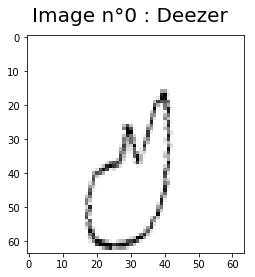

In [36]:
print_exemple_image(,Train_Classique['image'])

## Train et Test par apprentissage progressif

In [13]:
catégories= ['Deezer','Messenger','Facebook','Tinder']



In [14]:
for cat in catégories : 
    imPath = "Database/"+cat+"/"
    print(imPath)

Database/Deezer/
Database/Facebook/
Database/Messenger/
Database/Tinder/


In [15]:
%%time

X_train_progressif , X_test_progressif , Y_train_progressif , Y_test_progressif = [],[],[],[]

for cat in catégories : 
    imPath = "Database/"+cat+"/"
    ls_path = glob(os.path.join(imPath, '*' ))

    taille_train=len(ls_path)-len(ls_path)//5
    #Train
    for file in ls_path[:taille_train]: 
        im = np.array(Image.open(file))[:,:,3]   #On charge l'image
        X_train_progressif+=[im]
        Y_train_progressif+=[file.split('\\')[1].split('_')[0]]

    #Test
    for file in ls_path[taille_train:]: 
        im = np.array(Image.open(file))[:,:,3]   #On charge l'image
        X_test_progressif+=[im]
        Y_test_progressif+=[file.split('\\')[1].split('_')[0]]
    

X_train_progressif=np.array(X_train_progressif)
Y_train_progressif=np.array(Y_train_progressif)
X_test_progressif=np.array(X_test_progressif)
Y_test_progressif=np.array(Y_test_progressif)

Wall time: 22 s


In [16]:
%%time
Train_Progressif = transformation_dictionnaire_image(X_train_progressif,Y_train_progressif)
Test_Progressif = transformation_dictionnaire_image(X_test_progressif,Y_test_progressif)

Wall time: 789 ms


In [22]:
Train_Classique['image'].shape , Test_Classique['image'].shape

((1208, 8, 8), (303, 8, 8))

In [23]:
Train_Progressif['image'].shape , Test_Progressif['image'].shape

((1211, 8, 8), (300, 8, 8))